<a href="https://colab.research.google.com/github/sophie-myk/AIFFEL_quest_cr/blob/main/MainQuest/Quest02/Pokemon_Legend_finding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요



*   목적: [캐글]의 포켓몬 데이터에서 전설의 포켓몬 구별하기!

*   목표: 탐색적 데이터 분석(Exploratory Data Analysis, EDA)를 통해 머신러닝모델 만들기 학습하기.




#목차



1. 포켓몬 데이터셋 만들기
2. 데이터 전처리
3. 모델 준비
4. 모델 학습
5. 모델 평가
6. 모델 배포






# 주석 및 의견

In [2]:
#https://www.kaggle.com/datasets/abcsds/pokemon
#Kaggle에서 데이터셋을 다운로드한 후 업로드
from google.colab import files
uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


In [7]:
# 업로드된 파일이 무엇인지 확인 (파일 이름을 확인)
import io
df = pd.read_csv(io.BytesIO(uploaded['Pokemon.csv']))

# 데이터 확인
df.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [22]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# 원본 데이터의 사본을 pokemon이라는 변수에 저장
pokemon = df.copy()

# 사본이 제대로 저장됐는지 확인
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [23]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()   #800개 중 65개만 전설의 포켓몬 데이터라는 출력결과.

(65, 13)


#                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       95      125     85           1       True  
1      125       90    100           1       True  
2      125       85     90           1       True  
3      154       90    130           1       True  
4      154      100    130           1       True

In [24]:
# Q. 일반 포켓몬의 데이터셋도 만들어봅시다.
ordinary =  pokemon[pokemon["Legendary"] == False].reset_index(drop=False)
print(ordinary.shape)
ordinary.head()

(735, 14)


index  #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0      0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1      1  2                Ivysaur  Grass  Poison    405  60      62       63   
2      2  3               Venusaur  Grass  Poison    525  80      82       83   
3      3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4      4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [25]:
#결측치 확인
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

(65, 15)
(735, 16)
#                 0
Name              0
Type 1            0
Type 2          386
Total             0
HP                0
Attack            0
Defense           0
Sp. Atk           0
Sp. Def           0
Speed             0
Generation        0
Legendary         0
Name_nospace      0
name_isalpha      0
dtype: int64


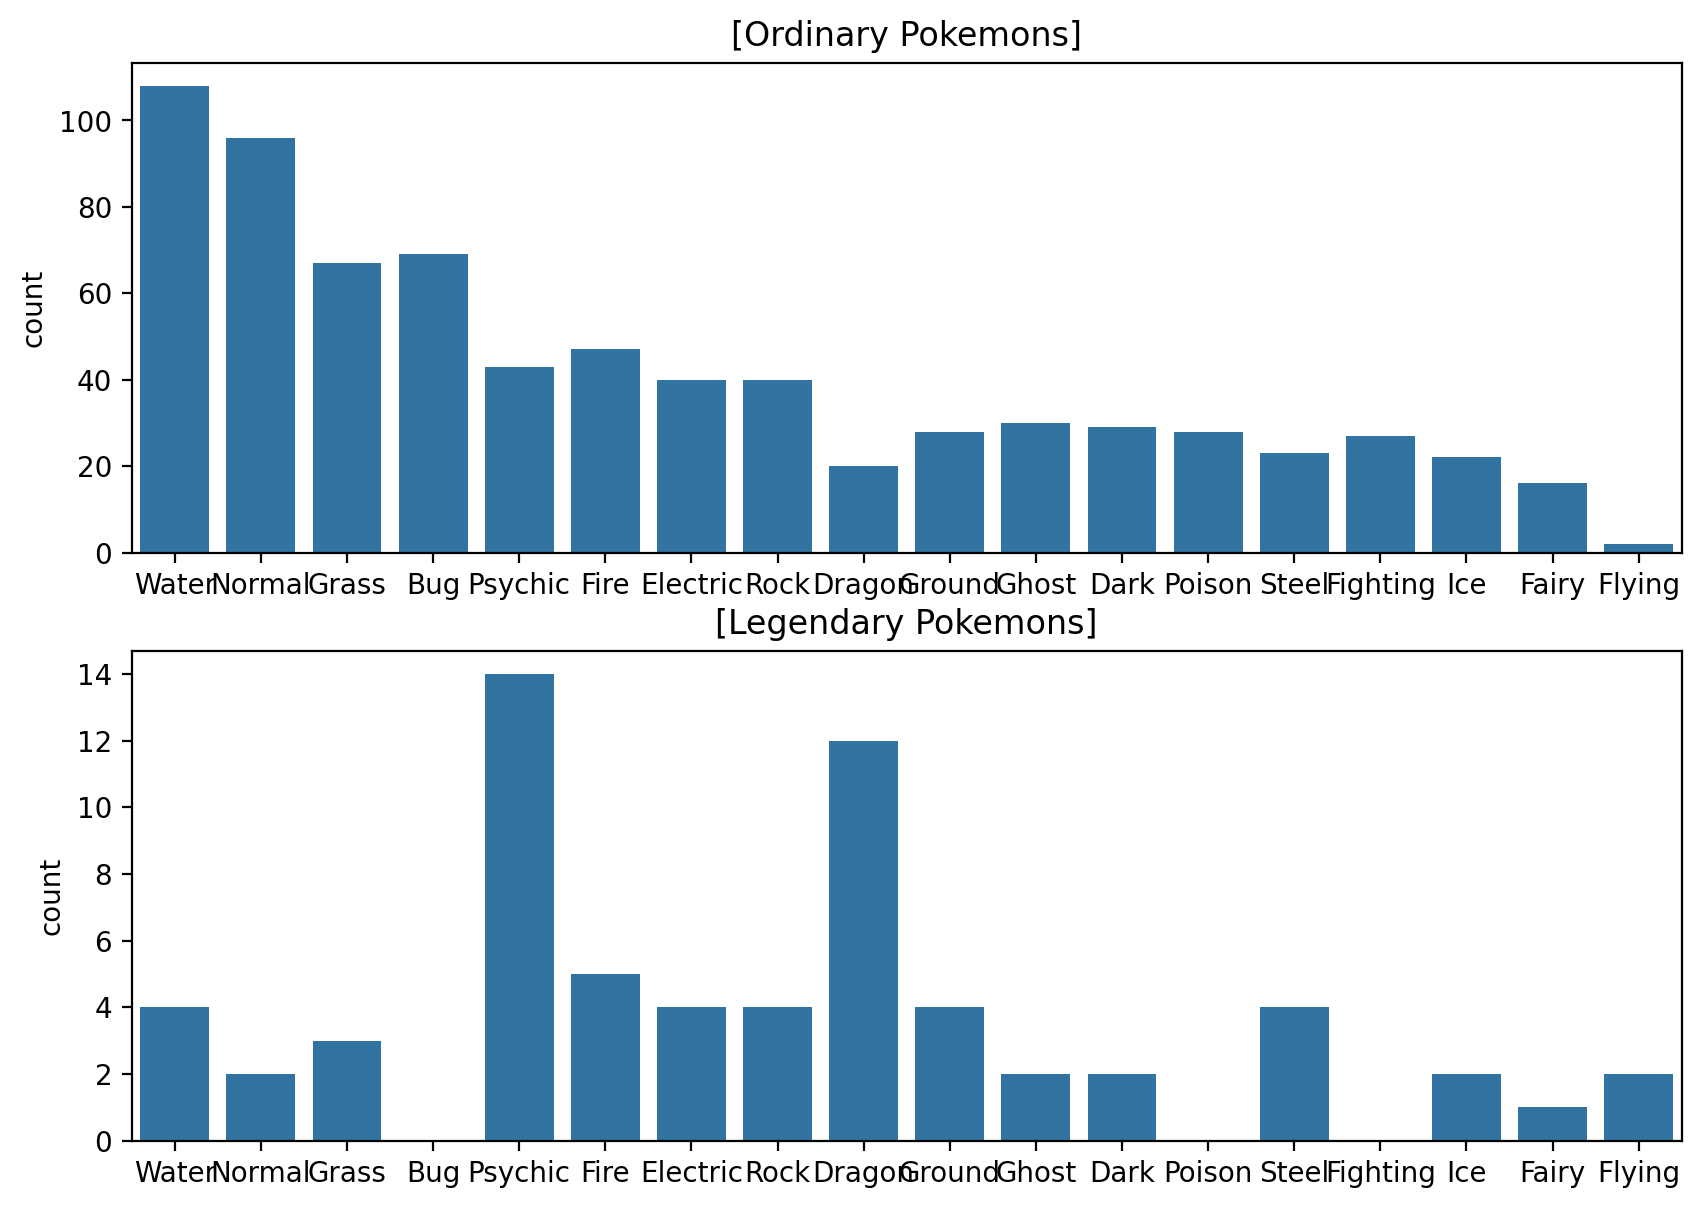

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


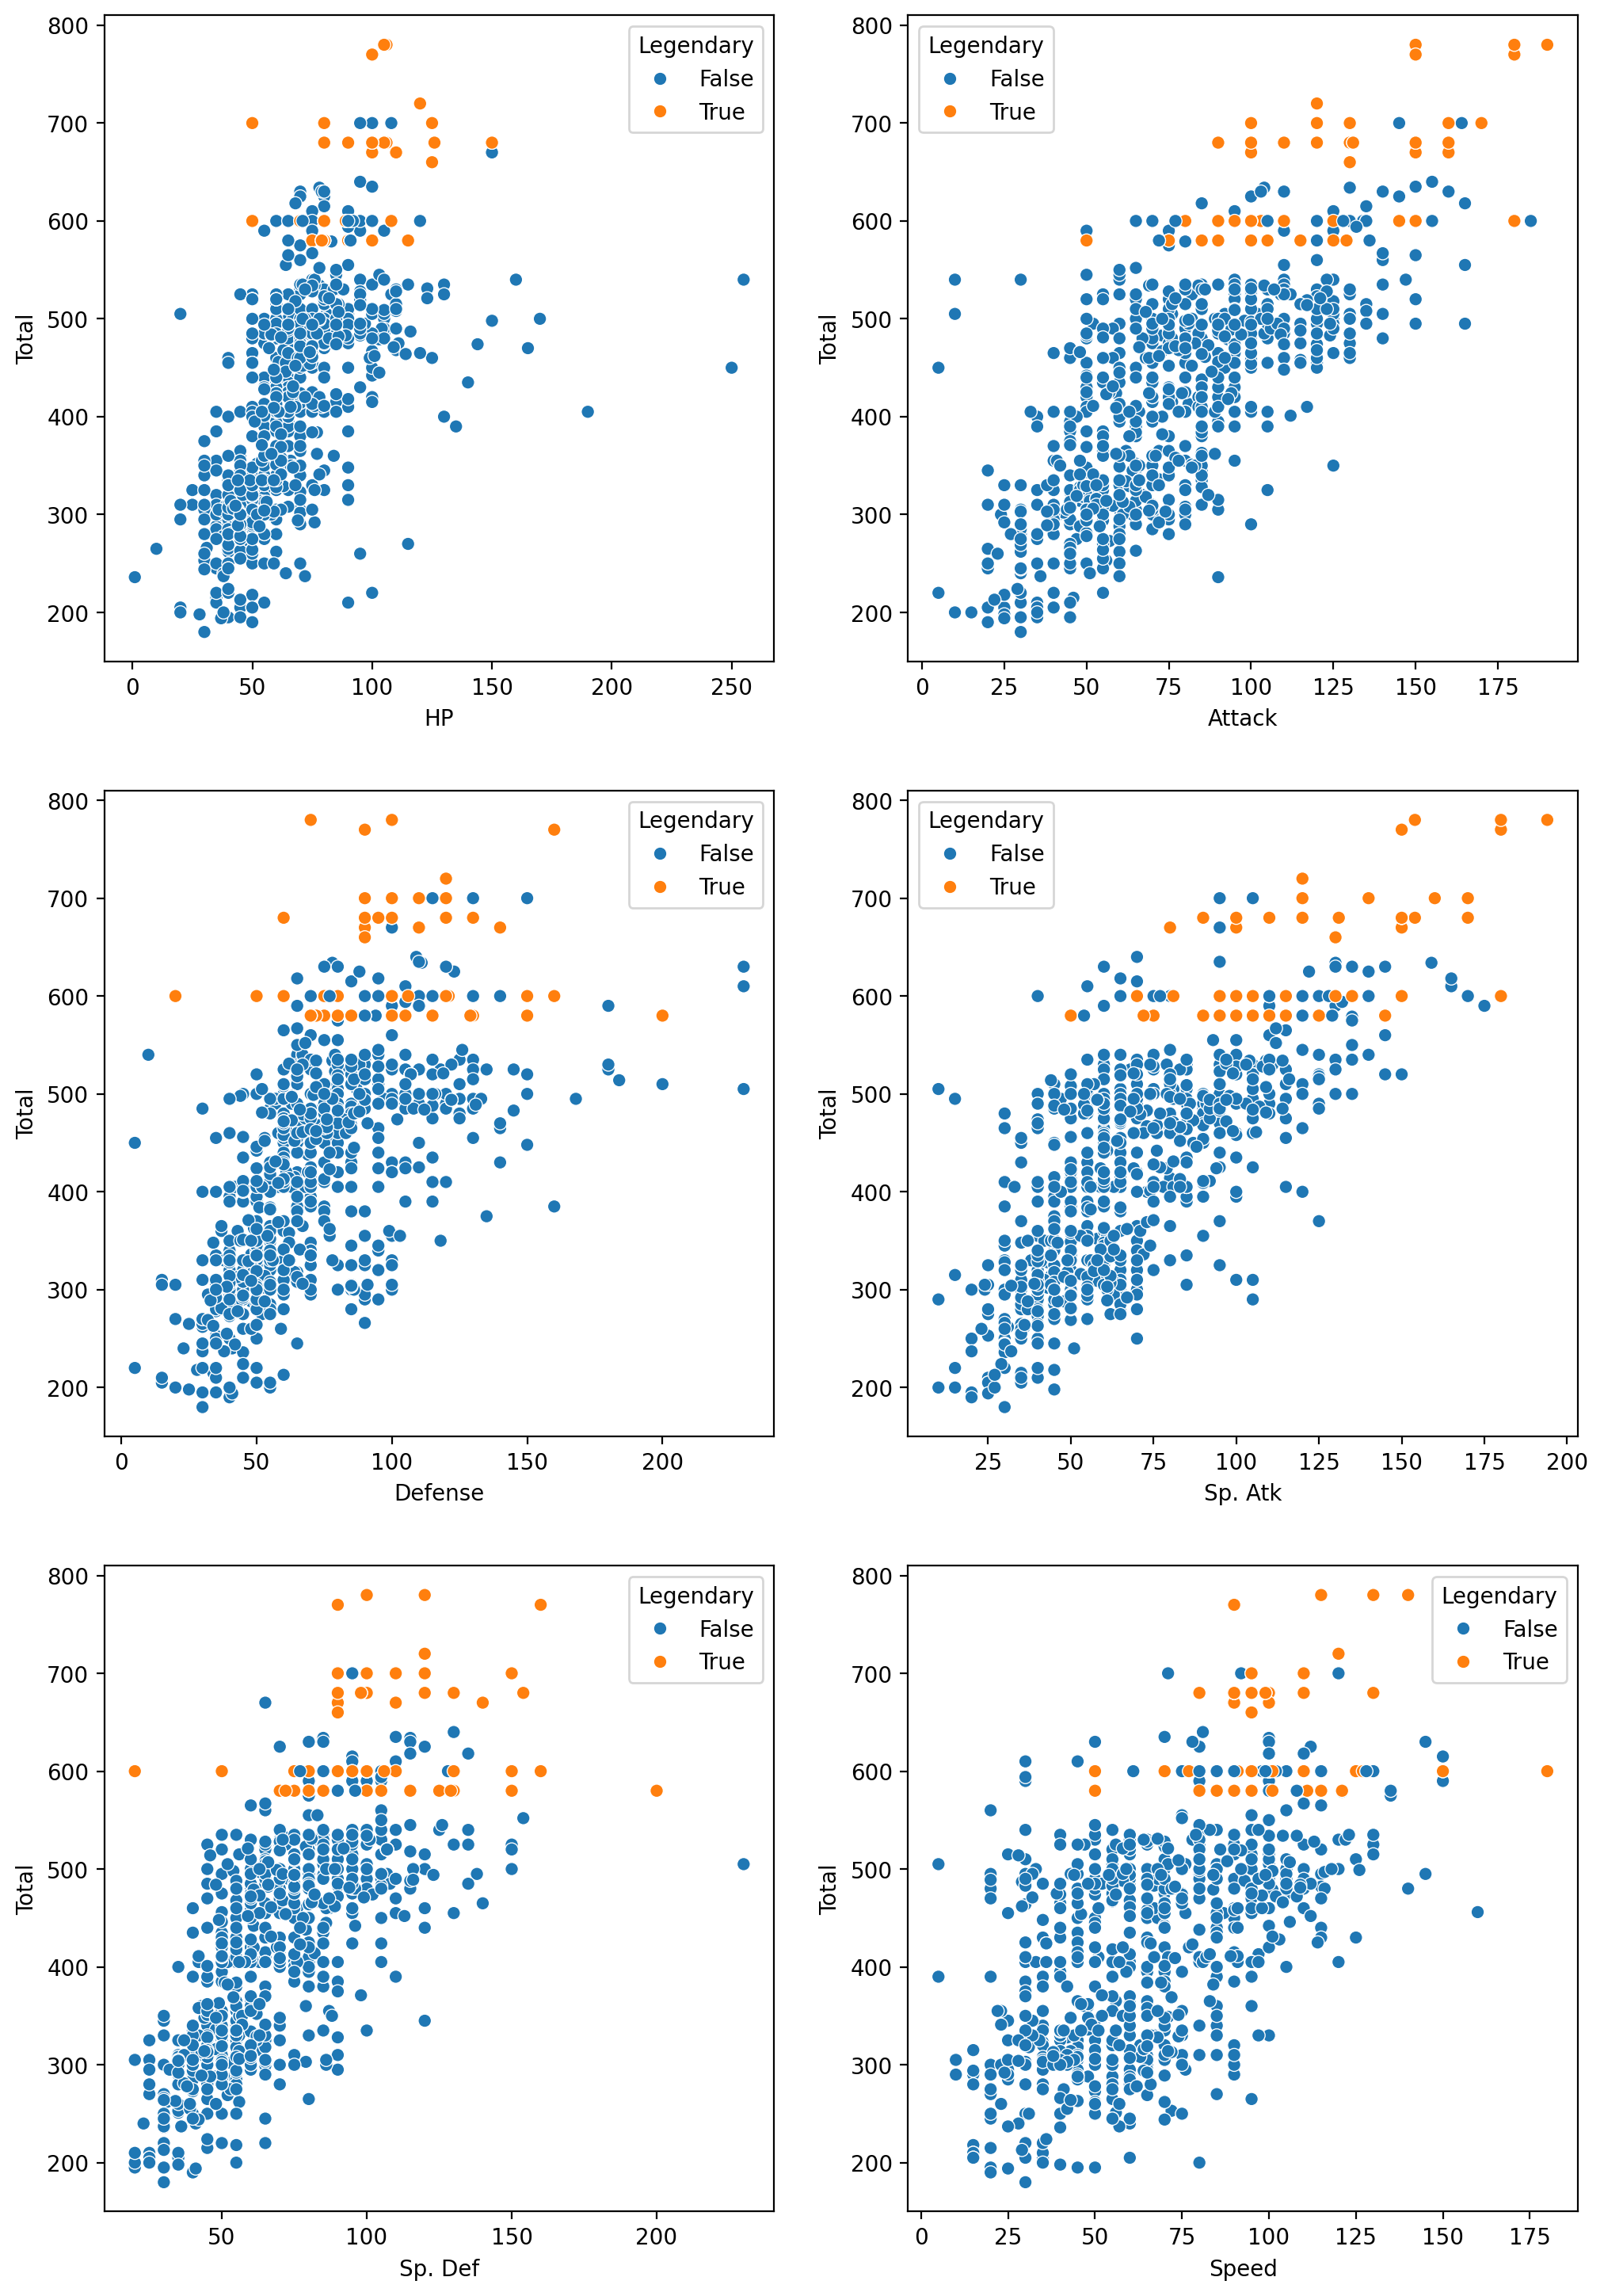

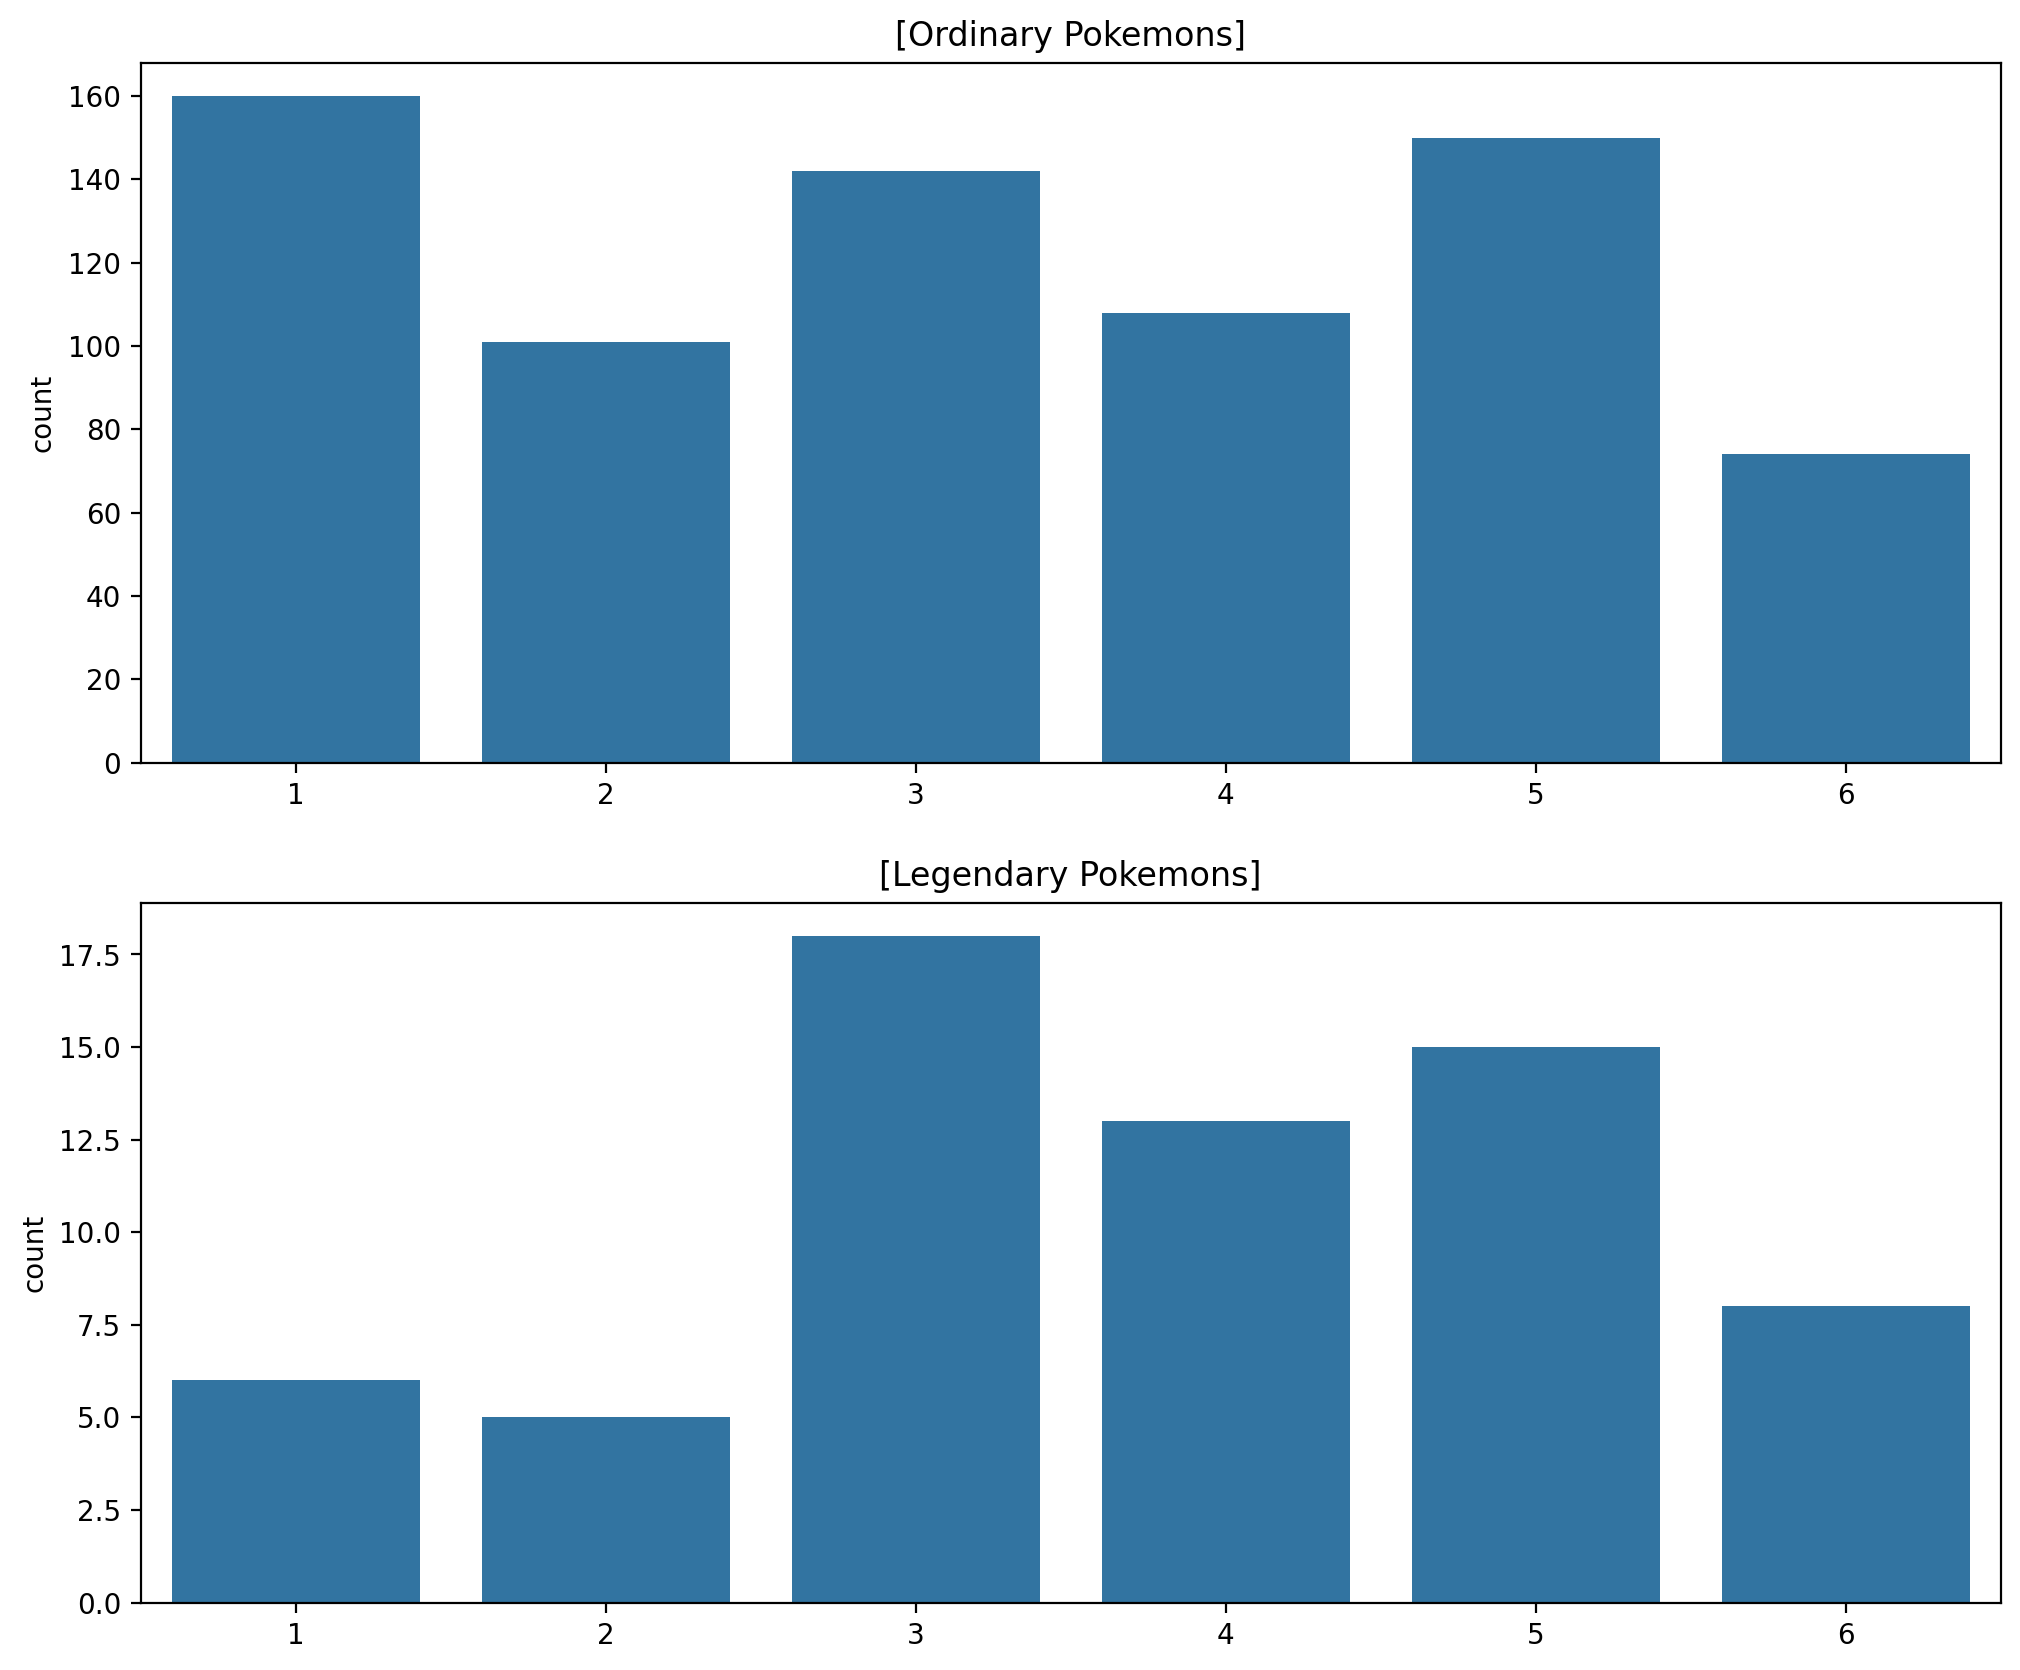

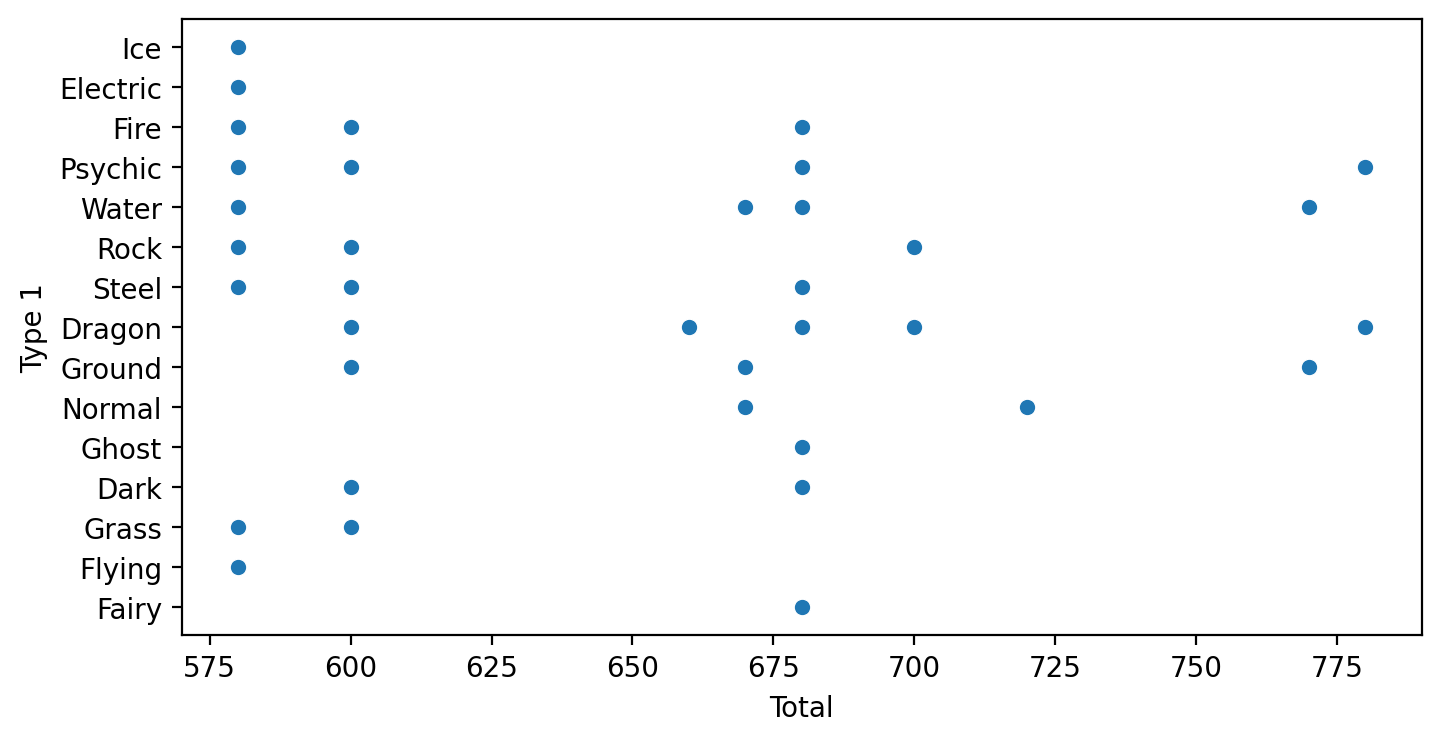

(0, 15)
(800, 8)
(800,)
(640, 8) (640,)
(160, 8) (160,)
Accuracy:  0.95
Confusion Matrix:
 [[144   3]
 [  5   8]]


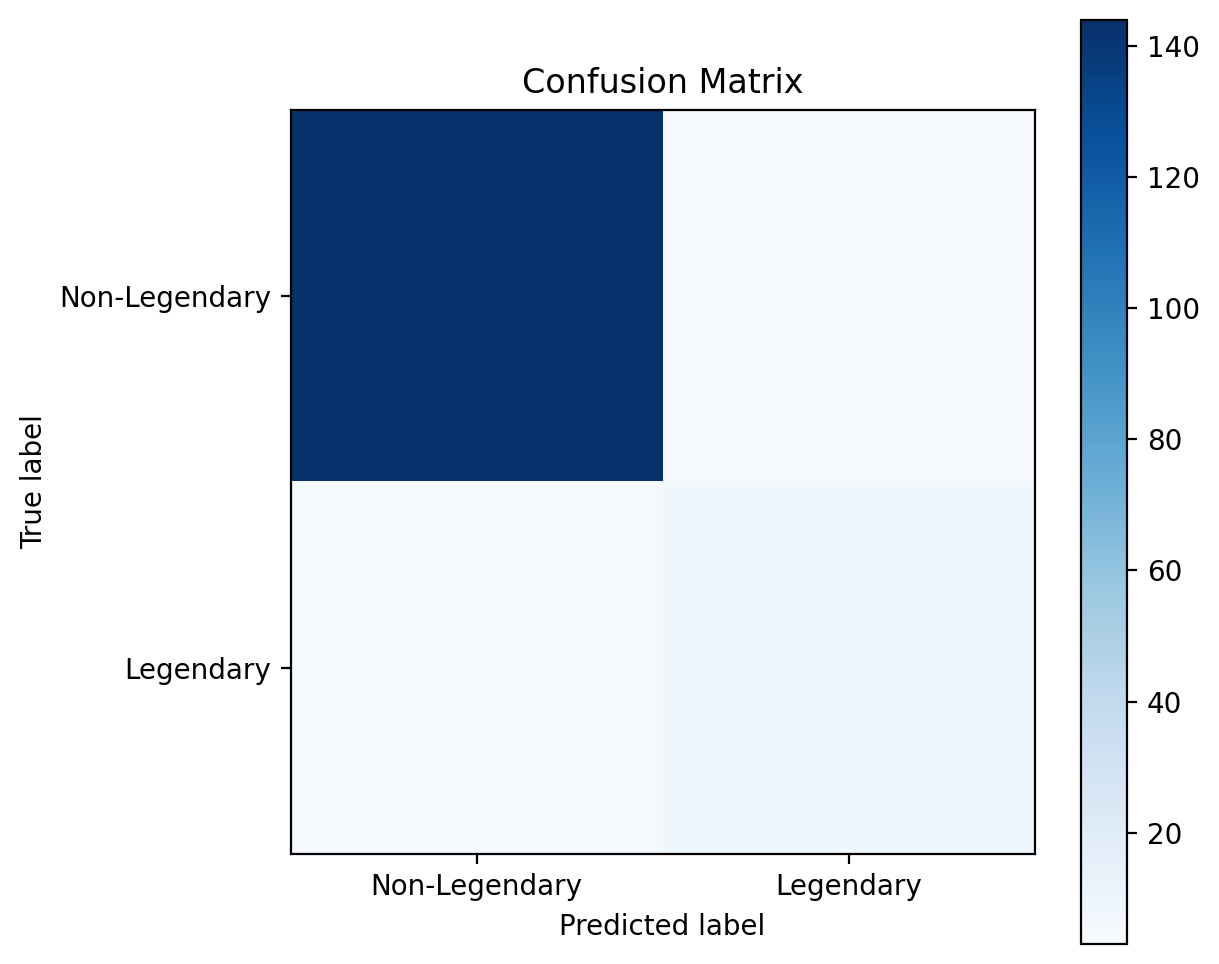

In [27]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()  # 800개 중 65개만 전설의 포켓몬 데이터라는 출력결과.

# 일반 포켓몬의 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=False)
print(ordinary.shape)
ordinary.head()

# 결측치 확인
print(pokemon.isnull().sum())

# 'Type 1'에 대한 카운트 그래프
types = list(pokemon['Type 1'].value_counts().index)
plt.figure(figsize=(10, 7))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

# 포켓몬 이름 및 스탯 정보 출력
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]))
print("sum of all stats: ", sum(list(pokemon.loc[0, ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])))

# 스탯 값의 분포 그래프
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)

sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

# Generation에 따른 분포
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

# 전설 포켓몬의 Type 1과 Total에 대한 scatter plot
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

# 'Name' 컬럼에 알파벳이 아닌 다른 문자가 포함된 경우를 처리
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())

# 알파벳이 아닌 문자가 포함된 포켓몬 이름 확인
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

# 이름에 알파벳이 아닌 다른 문자가 포함된 포켓몬 이름 수정
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

# 'Name' 컬럼에서 공백 제거 후 'Name_nospace' 컬럼 생성
pokemon['Name_nospace'] = pokemon['Name'].str.replace(' ', '')
# isalpha() 체크 후 새로운 컬럼 생성
pokemon['name_isalpha'] = pokemon['Name_nospace'].str.isalpha()

# 특성(features) 컬럼을 X에 저장
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
X = pokemon[features]
print(X.shape)
X.head()

# target 컬럼을 y에 저장
y = pokemon['Legendary']
print(y.shape)
y.head()

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 의사결정 트리 모델 훈련
dtc = DecisionTreeClassifier(random_state=15)
dtc.fit(X_train, y_train)

# 예측값
y_pred = dtc.predict(X_test)

# 모델 평가: 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# 혼동 행렬 출력
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 혼동 행렬 시각화
fig, ax = plt.subplots(figsize=(6, 6))

# confusion_matrix는 이미 2D 배열이므로 바로 imshow에 전달
cax = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

ax.set_title('Confusion Matrix')
ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))
ax.set_xticklabels(['Non-Legendary', 'Legendary'])
ax.set_yticklabels(['Non-Legendary', 'Legendary'])

plt.xlabel('Predicted label')
plt.ylabel('True label')

# colorbar 추가
fig.colorbar(cax)

plt.show()

# 요약

1. 데이터 로드 및 전처리:

 Kaggle에서 데이터를 업로드하고, 전설의 포켓몬과 일반 포켓몬을 구분하여 데이터를 전처리합니다.

2. 특성 및 목표 변수 설정:

'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation' 컬럼을 특성(X)으로, 'Legendary' 컬럼을 목표 변수(y)로 설정합니다.

3. 훈련 및 테스트 데이터 분리:

train_test_split을 사용하여 데이터를 훈련 세트와 테스트 세트로 나눕니다.

4. 의사결정 트리 모델 학습 및 예측:

DecisionTreeClassifier를 사용하여 모델을 학습하고, 테스트 세트에서 예측을 수행합니다.

5. 결과 출력:

모델의 정확도(Accuracy)를 출력하여 모델이 테스트 데이터에서 얼마나 잘 예측했는지 평가.
이 과정은 데이터 전처리, 모델 학습, 예측 및 평가라는 기본적인 머신러닝 프로세스를 통해, 전설의 포켓몬을 분류하는 모델을 생성하는 과정.

6. 혼동 행렬 출력 및 시각화:

confusion_matrix를 사용하여 혼동 행렬을 계산하고, imshow와 colorbar를 사용하여 혼동 행렬을 시각화합니다.

# 회고

별점 1개가 무색하게 내게는 너무 어려운 과제였다. 잘 따라가는가 싶으면서도 자꾸 오류가 나서, 자꾸만 앞으로 돌아가서 새로 데이터를 작성하게 되는 과제였다.

이번 과제를 통해 실제로 모델을 돌리기에 앞서 전처리를 확실하게 하는 과정이 얼마나 중요한지 깨닫게 된 것 같고 앞으로의 과제가 더 두렵다.

# 참고

Chat-GPT 선생님.